In [1]:
from mitoolspro.regressions.statistical_tests import StatisticalTests
import numpy as np
import pandas as pd

# StatisticalTests implementation review

## Create Data

In [2]:
np.random.seed(42)
n = 2_000  # number of observations
phi = 0.8
stationary_col = np.zeros(n)
eps_stationary = np.random.randn(n) * 0.5
for t in range(1, n):
    stationary_col[t] = phi * stationary_col[t-1] + eps_stationary[t]
rw = np.zeros(n)
eps_rw = np.random.randn(n) * 0.3
for t in range(1, n):
    rw[t] = rw[t-1] + eps_rw[t]
normal_col = np.random.normal(loc=5.0, scale=2.0, size=n)
skewed_col = np.random.lognormal(mean=1.5, sigma=0.7, size=n)
x2 = 1.2 * normal_col + np.random.normal(scale=1.0, size=n)
noise = np.random.normal(scale=0.8, size=n)
y = 10 + 0.5*stationary_col - 1.0*normal_col + 0.3*x2 + noise
df = pd.DataFrame({
    "stationary_col": stationary_col,
    "nonstationary_col": rw,
    "normal_col": normal_col,
    "skewed_col": skewed_col,
    "x2": x2,
    "y": y
})
df.index = pd.date_range(start="2000-01-01", periods=n, freq="D")

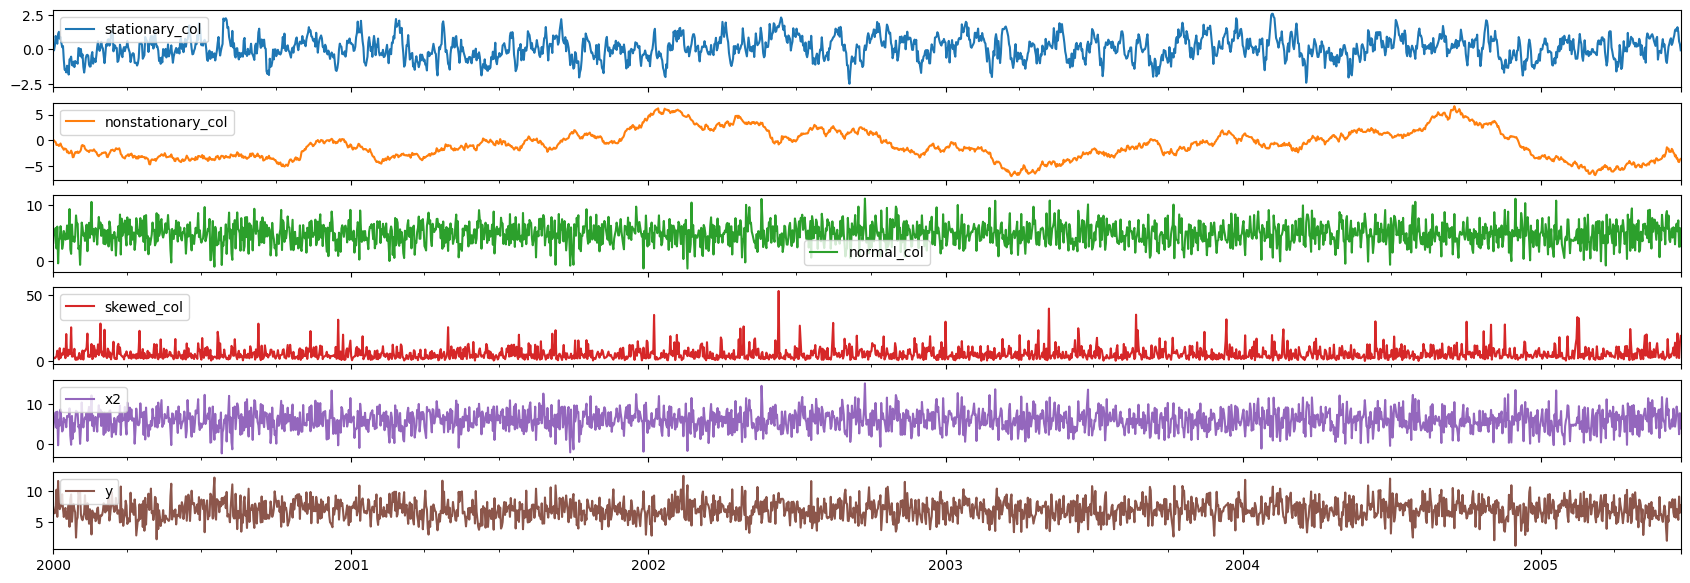

In [3]:
_ = df.plot(subplots=True, figsize=(21, 7))

## Initilize StatisticalTests

In [4]:
stats = StatisticalTests(df, dependent_variable="y")
print(stats)

Statistical Tests Configuration:
Data Shape: (2000, 6)
Dependent Variable: y
Independent Variables:
  - stationary_col
  - nonstationary_col
  - normal_col
  - skewed_col
  - x2


In [5]:
stats

StatisticalTests(data.shape=(2000, 6), dependent_variable='y', independent_variables=['stationary_col', 'nonstationary_col', 'normal_col', 'skewed_col', 'x2'])

### Shapiro Test

In [6]:
stats.shapiro_test()

,statistic,p-value
variable,,
stationary_col,0.999222,5.807627e-01
nonstationary_col,0.984261,4.850326e-14
normal_col,0.998993,3.259018e-01
skewed_col,0.770342,1.851347e-46
x2,0.999492,9.009909e-01
y,0.999306,6.893730e-01


### Anderson Test

In [7]:
stats.anderson_test()

,statistic,critical_value
variable,,
stationary_col,0.208655,1.09
nonstationary_col,7.468330,1.09
normal_col,0.364825,1.09
skewed_col,105.818858,1.09
x2,0.226408,1.09
y,0.332885,1.09


### ADF Test

In [8]:
stats.adf_test()

,statistic,p-value,critical_value_5%
variable,,,
stationary_col,-15.116406,7.567961e-28,-2.862987
nonstationary_col,-2.343483,1.583269e-01,-2.862987
normal_col,-46.130499,0.000000e+00,-2.862987
skewed_col,-45.204542,0.000000e+00,-2.862987
x2,-46.694250,0.000000e+00,-2.862987
y,-29.243634,0.000000e+00,-2.862988


### VIF

In [9]:
stats.calculate_vif(threshold=10.0)

,VIF,hypothesis
variable,,
const,8.485316,Accept
stationary_col,1.006166,Accept
nonstationary_col,1.004483,Accept
normal_col,6.795551,Accept
skewed_col,1.003354,Accept
x2,6.791433,Accept


### Durbin-Watson Test

In [10]:
stats.durbin_watson_test()

,DW Statistic,Hypothesis
y,1.962828,Accept (Little to no autocorrelation)


### Breusch-Pagan Test

In [11]:
stats.breusch_pagan_test()

,BP Statistic,p-value,Hypothesis
y,1.982697,0.851534,Accept (No apparent heteroscedasticity)


### White Test

In [12]:
stats.white_test()

,White Statistic,p-value,Hypothesis
y,14.678371,0.794506,Accept (No apparent heteroscedasticity)


***